<a href="https://colab.research.google.com/github/alexloaeza12/Simulaci-n-I/blob/main/Transoformada_inversa_entregar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de la transformada inversa

El ejemplo incluiye:

- Gráfica de la función de densidad de probabilidad (fdp).
- Gráfica de la función acumulativa.
- Histograma de la muestra generada.
- Notas y aclaraciones documentadas.


---



---



La función de densidad de probabilidad es  f(x) = 20 * x * (1 - x) ** 3

Importamos la librarías necesarias

In [37]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.integrate import quad

Verificación de que la fdp es una función válida
- Verificamos que la integral de 0 a 1, sea 1.


In [38]:
# Definimos la función de densidad de probabilidad (fdp)
def fdp(x):
    return 20 * x * (1 - x) ** 3

# Verificamos que la integral de la fdp de 0 a 1 sea 1
integral, _ = quad(fdp, 0, 1)
print(f'Integral de la fdp de 0 a 1: {integral}')  # Debe ser 1

Integral de la fdp de 0 a 1: 1.0


Procedemos con el método
- Gráficamos de la función de densidad de probabilidad (fdp).

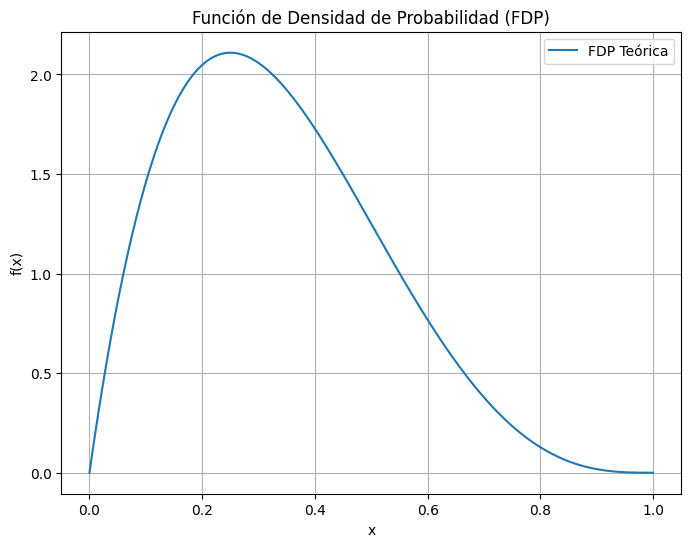

In [39]:
# Generacimos las muestras usando el método de la transformada inversa
lista = []
for _ in range(10000):
    u = random.random()  # Generamos un valor uniforme en [0, 1)
    x = 1 - (1 - u) ** (1/3)  # Transformada inversa de la CDF de la función dada
    lista.append(x)

x_vals = np.linspace(0, 1, 400)
fdp = fdp(x_vals)

# Graficamos la fdp teórica
plt.figure(figsize=(8, 6))
plt.plot(x_vals, fdp, label='FDP Teórica')
plt.title('Función de Densidad de Probabilidad (FDP)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Graficamos el histograma de la muestra generada


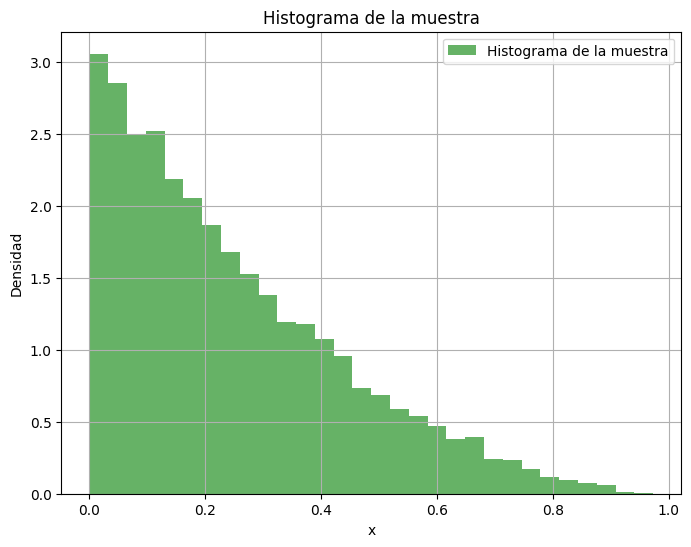

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(lista, bins=30, density=True, alpha=0.6, color='g', label='Histograma de la muestra')
plt.title('Histograma de la muestra')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

Graficamos el histograma de la muestra generada


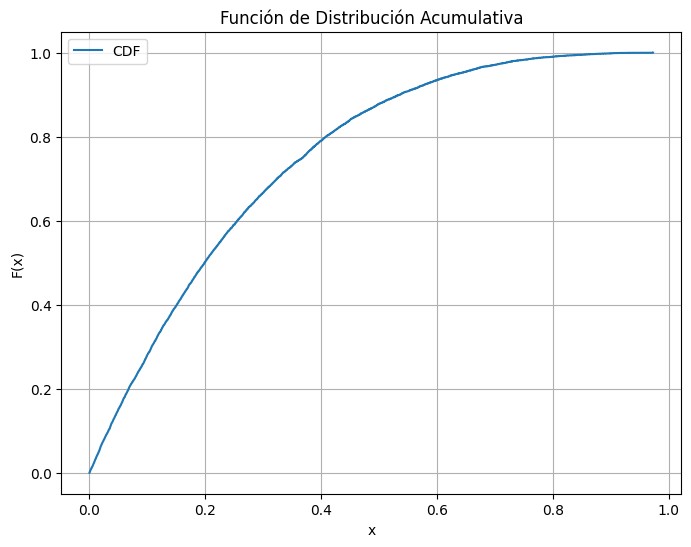

In [41]:
# Función de distribución acumulativa
def cdf(muestra):
    n = len(muestra)
    x = np.sort(muestra)
    y = np.arange(1, n + 1) / n
    return x, y

X, Y = cdf(lista)

# Graficamos la función acumulativa
plt.figure(figsize=(8, 6))
plt.step(X, Y, where='post', label='CDF')
plt.title('Función de Distribución Acumulativa')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()